In [1]:
# Importing the libraries that we might need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# Loading the dataset
data = pd.read_csv('survey_no_email.csv')


In [3]:
# Having a look at the dataset
data.head()


,Timestamp,Were you able to access HMS on day of allocation?,Did you select the single room out of your own volition?,"What's the reason you do not like the 4th/5th cluster?\n(you can choose multiple answers!) (if you chose the cluster willingly, add the reason in others)",What would you want from admin side?,If there is anything else let us know!
0,2023/07/12 1:43:55 PM GMT+5:30,Yes,"No, I didn’t have any other choice.",The distance from the academic blocks/isolated...,Reduction in single room fees;Ability to switc...,NaN
1,2023/07/12 1:44:12 PM GMT+5:30,No,"No, I didn’t have any other choice.",The distance from the academic blocks/isolated...,Reduction in single room fees;Ability to switc...,NaN
2,2023/07/12 1:44:17 PM GMT+5:30,No,"No, I didn’t have any other choice.",The distance from the academic blocks/isolated...,Reduction in single room fees,NaN
3,2023/07/12 1:44:43 PM GMT+5:30,No,"No, I didn’t have any other choice.",The distance from the academic blocks/isolated...,Reduction in single room fees,-
4,2023/07/12 1:45:04 PM GMT+5:30,No,"No, I didn’t have any other choice.",Unreasonably high fees;Non functioning AC/Low ...,Reduction in single room fees;Ability to switc...,NaN


In [4]:
# Checking for null values in the dataset
data.isnull().sum().sort_values(ascending=False)


If there is anything else let us know!                                                                                                                       170
What's the reason you do not like the 4th/5th cluster?\n(you can choose multiple answers!) (if you chose the cluster willingly, add the reason in others)      1
Timestamp                                                                                                                                                      0
Were you able to access HMS on day of allocation?                                                                                                              0
Did you select the single room out of your own volition?                                                                                                       0
What would you want from admin side?                                                                                                                           0
dtype: int64

In [5]:
# We can observe that there are null values in the Reason of not liking the 4th/5th cluster and majority null values in the last question where we asked for anything else the students might want to add on


In [6]:
# Dropping the timestamp column since it is not needed
data = data.drop('Timestamp', axis=1)


In [7]:
# Having a look at the updated dataset
data.head()


,Were you able to access HMS on day of allocation?,Did you select the single room out of your own volition?,"What's the reason you do not like the 4th/5th cluster?\n(you can choose multiple answers!) (if you chose the cluster willingly, add the reason in others)",What would you want from admin side?,If there is anything else let us know!
0,Yes,"No, I didn’t have any other choice.",The distance from the academic blocks/isolated...,Reduction in single room fees;Ability to switc...,NaN
1,No,"No, I didn’t have any other choice.",The distance from the academic blocks/isolated...,Reduction in single room fees;Ability to switc...,NaN
2,No,"No, I didn’t have any other choice.",The distance from the academic blocks/isolated...,Reduction in single room fees,NaN
3,No,"No, I didn’t have any other choice.",The distance from the academic blocks/isolated...,Reduction in single room fees,-
4,No,"No, I didn’t have any other choice.",Unreasonably high fees;Non functioning AC/Low ...,Reduction in single room fees;Ability to switc...,NaN


In [8]:
print(data['If there is anything else let us know!'][25])


Even though 4th year girls were given priority but altogether the options were so low. Most of the 4th year students have to do thesis and in this situation, we really need to have a proper setting for mental support which is impossible while staying alone. There could have been other methods of room selection which can also include in person registration for hostels. 


In [9]:
responses = data['If there is anything else let us know!'].dropna().values


In [10]:
print(responses)


['-' ':3'
 'Even though 4th year girls were given priority but altogether the options were so low. Most of the 4th year students have to do thesis and in this situation, we really need to have a proper setting for mental support which is impossible while staying alone. There could have been other methods of room selection which can also include in person registration for hostels. '
 'Please come to a decision before paying fees.'
 'Is there any limited time for which we can use AC?'
 'We Should be given the right to choose our rooms as well as room mates we are paying soo much fees and then 40k more without our choice'
 "The reason I was not able to access HMS was completely admin's fault.Although I had no outstanding fees on SPC still I was being shown that I have to pay the fees first and then move forward for room selection I had to mail them multiple times to get this issue resolved and by the time they corrected it there was no option left but to take 4th cluster."
 'It’s so simpl

In [11]:
responses.shape


(38,)

In [12]:
to_admins = data['What would you want from admin side?'].dropna().values


We now have data showing the students reviews and response about the HMS and booking. We will begin some basic preprocessing before making sense out of this data

In [13]:
for index, values in enumerate(responses):
    responses[index] = values.lower()

print(responses)


['-' ':3'
 'even though 4th year girls were given priority but altogether the options were so low. most of the 4th year students have to do thesis and in this situation, we really need to have a proper setting for mental support which is impossible while staying alone. there could have been other methods of room selection which can also include in person registration for hostels. '
 'please come to a decision before paying fees.'
 'is there any limited time for which we can use ac?'
 'we should be given the right to choose our rooms as well as room mates we are paying soo much fees and then 40k more without our choice'
 "the reason i was not able to access hms was completely admin's fault.although i had no outstanding fees on spc still i was being shown that i have to pay the fees first and then move forward for room selection i had to mail them multiple times to get this issue resolved and by the time they corrected it there was no option left but to take 4th cluster."
 'it’s so simpl

Removing punctuation marks from the responses to help us make word-cloud and tf-idf of the responses 

In [14]:
import re
for index, values in enumerate(responses):
    responses[index] = re.sub(r'[^\w\s]', '', values)

print(responses)


['' '3'
 'even though 4th year girls were given priority but altogether the options were so low most of the 4th year students have to do thesis and in this situation we really need to have a proper setting for mental support which is impossible while staying alone there could have been other methods of room selection which can also include in person registration for hostels '
 'please come to a decision before paying fees'
 'is there any limited time for which we can use ac'
 'we should be given the right to choose our rooms as well as room mates we are paying soo much fees and then 40k more without our choice'
 'the reason i was not able to access hms was completely admins faultalthough i had no outstanding fees on spc still i was being shown that i have to pay the fees first and then move forward for room selection i had to mail them multiple times to get this issue resolved and by the time they corrected it there was no option left but to take 4th cluster'
 'its so simple theyre for

Removing stop-words from the responses

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


def remove_stopwords(sentences):
    # Get the list of English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stop words from each sentence in the array
    cleaned_sentences = []
    for sentence in sentences:
        # Tokenize the sentence into words
        words = nltk.word_tokenize(sentence)

        # Remove stop words from the sentence
        filtered_words = [
            word for word in words if word.lower() not in stop_words]

        # Join the filtered words back into a sentence
        cleaned_sentence = ' '.join(filtered_words)

        # Append the cleaned sentence to the list
        cleaned_sentences.append(cleaned_sentence)

    return cleaned_sentences


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaishnav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
responses = remove_stopwords(responses)
print(responses)


['', '3', 'even though 4th year girls given priority altogether options low 4th year students thesis situation really need proper setting mental support impossible staying alone could methods room selection also include person registration hostels', 'please come decision paying fees', 'limited time use ac', 'given right choose rooms well room mates paying soo much fees 40k without choice', 'reason able access hms completely admins faultalthough outstanding fees spc still shown pay fees first move forward room selection mail multiple times get issue resolved time corrected option left take 4th cluster', 'simple theyre forcing us 2nd years take single rooms cause dont space left towers occupational maybe increase student strength point ones cant get twin sharing room pay extra said wouldnt force anyone single rooms technicality definitely able choose room partner increased traffic website almost two fold dont believe sensible thing obviously ended crashing students hence forced pay fee',

Let us also do sentiment analysis to get an idea about the reviews.
Polarity goes from (-1 to +1) where -1 means negative and +1 means positive, and other values also follow the same trend

In [17]:
from textblob import TextBlob
blob_sentences = []
for sentence in responses:
    blob_sentences.append(TextBlob(sentence))

polarity_scores = [sentence.sentiment.polarity for sentence in blob_sentences]
count_polar = 0

for polarity in polarity_scores:
    if (polarity < 0):
        count_polar += 1

print(sorted(polarity_scores))


[-0.7999999999999999, -0.21785714285714286, -0.13571428571428573, -0.11923076923076924, -0.11666666666666665, -0.11333333333333333, -0.08333333333333333, -0.08011904761904762, -0.075, -0.07142857142857142, -0.07142857142857142, -0.07083333333333333, -0.041666666666666664, -0.006249999999999992, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006349206349206345, 0.010822510822510808, 0.01428571428571429, 0.0961904761904762, 0.1, 0.10714285714285715, 0.11666666666666667, 0.14032738095238093, 0.16666666666666666, 0.20000000000000004, 0.225, 0.225, 0.24285714285714285, 0.4, 0.40952380952380957, 0.5]


Let us now get the average of the polarity scores

In [18]:
mean_polarity = np.mean(polarity_scores)
print(mean_polarity)
print(count_polar)


0.025209755522255527
14


We can see that 14 out of the 38 reviews were negative, 8 are neutral and even the most positive review only got a score of 0.5.
 

In [19]:
percentage_non_positive = ((14+8)/38)*100
print(f"The percentage non positive reviews were {percentage_non_positive} %")


The percentage non positive reviews were 57.89473684210527 %


We have to tokenize each word now for the words or n-grams to count for frequency

In [20]:
def tokenize_words(list_of_strings):
    tokenized_words = []
    for string in list_of_strings:
        words = nltk.word_tokenize(string)
        tokenized_words.append(words)
    return tokenized_words


responses = tokenize_words(responses)
print(responses)


[[], ['3'], ['even', 'though', '4th', 'year', 'girls', 'given', 'priority', 'altogether', 'options', 'low', '4th', 'year', 'students', 'thesis', 'situation', 'really', 'need', 'proper', 'setting', 'mental', 'support', 'impossible', 'staying', 'alone', 'could', 'methods', 'room', 'selection', 'also', 'include', 'person', 'registration', 'hostels'], ['please', 'come', 'decision', 'paying', 'fees'], ['limited', 'time', 'use', 'ac'], ['given', 'right', 'choose', 'rooms', 'well', 'room', 'mates', 'paying', 'soo', 'much', 'fees', '40k', 'without', 'choice'], ['reason', 'able', 'access', 'hms', 'completely', 'admins', 'faultalthough', 'outstanding', 'fees', 'spc', 'still', 'shown', 'pay', 'fees', 'first', 'move', 'forward', 'room', 'selection', 'mail', 'multiple', 'times', 'get', 'issue', 'resolved', 'time', 'corrected', 'option', 'left', 'take', '4th', 'cluster'], ['simple', 'theyre', 'forcing', 'us', '2nd', 'years', 'take', 'single', 'rooms', 'cause', 'dont', 'space', 'left', 'towers', 'occ

In [21]:
# print(responses[5])

list_response = []
for sen_number, sentences in enumerate(responses):
    for word_index, word in enumerate(sentences):
        list_response.append(sentences[word_index])

print(list_response)


['3', 'even', 'though', '4th', 'year', 'girls', 'given', 'priority', 'altogether', 'options', 'low', '4th', 'year', 'students', 'thesis', 'situation', 'really', 'need', 'proper', 'setting', 'mental', 'support', 'impossible', 'staying', 'alone', 'could', 'methods', 'room', 'selection', 'also', 'include', 'person', 'registration', 'hostels', 'please', 'come', 'decision', 'paying', 'fees', 'limited', 'time', 'use', 'ac', 'given', 'right', 'choose', 'rooms', 'well', 'room', 'mates', 'paying', 'soo', 'much', 'fees', '40k', 'without', 'choice', 'reason', 'able', 'access', 'hms', 'completely', 'admins', 'faultalthough', 'outstanding', 'fees', 'spc', 'still', 'shown', 'pay', 'fees', 'first', 'move', 'forward', 'room', 'selection', 'mail', 'multiple', 'times', 'get', 'issue', 'resolved', 'time', 'corrected', 'option', 'left', 'take', '4th', 'cluster', 'simple', 'theyre', 'forcing', 'us', '2nd', 'years', 'take', 'single', 'rooms', 'cause', 'dont', 'space', 'left', 'towers', 'occupational', 'mayb

Finally we stem our words, otherwise it will mess up with the frequency of words- counting open and opened as two seperate words and such-

In [22]:
from nltk.stem import WordNetLemmatizer


def lemma_words(word_list):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in word_list]
    return lemmatized_words


lemmatized_words = lemma_words(list_response)
print(lemmatized_words)


['3', 'even', 'though', '4th', 'year', 'girl', 'given', 'priority', 'altogether', 'option', 'low', '4th', 'year', 'student', 'thesis', 'situation', 'really', 'need', 'proper', 'setting', 'mental', 'support', 'impossible', 'staying', 'alone', 'could', 'method', 'room', 'selection', 'also', 'include', 'person', 'registration', 'hostel', 'please', 'come', 'decision', 'paying', 'fee', 'limited', 'time', 'use', 'ac', 'given', 'right', 'choose', 'room', 'well', 'room', 'mate', 'paying', 'soo', 'much', 'fee', '40k', 'without', 'choice', 'reason', 'able', 'access', 'hm', 'completely', 'admins', 'faultalthough', 'outstanding', 'fee', 'spc', 'still', 'shown', 'pay', 'fee', 'first', 'move', 'forward', 'room', 'selection', 'mail', 'multiple', 'time', 'get', 'issue', 'resolved', 'time', 'corrected', 'option', 'left', 'take', '4th', 'cluster', 'simple', 'theyre', 'forcing', 'u', '2nd', 'year', 'take', 'single', 'room', 'cause', 'dont', 'space', 'left', 'tower', 'occupational', 'maybe', 'increase', '

In [23]:
string_words = " "
for word in lemmatized_words:
    string_words += word+" "

print(string_words)


 3 even though 4th year girl given priority altogether option low 4th year student thesis situation really need proper setting mental support impossible staying alone could method room selection also include person registration hostel please come decision paying fee limited time use ac given right choose room well room mate paying soo much fee 40k without choice reason able access hm completely admins faultalthough outstanding fee spc still shown pay fee first move forward room selection mail multiple time get issue resolved time corrected option left take 4th cluster simple theyre forcing u 2nd year take single room cause dont space left tower occupational maybe increase student strength point one cant get twin sharing room pay extra said wouldnt force anyone single room technicality definitely able choose room partner increased traffic website almost two fold dont believe sensible thing obviously ended crashing student hence forced pay fee hope fee reduced admin dont mind single room

Next we create a TF-IDF (Term Frequency - Inverse Domain Frequency) that highlights the unique words more which will help us pay attention to the unique problems faced by the students.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
vecs = vectorizer.fit_transform(lemmatized_words)
feature_names = vectorizer.vocabulary_.keys()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df.T.sum(axis=1)


4th           1.0
year          1.0
girl          1.0
given         1.0
priority      1.0
             ... 
opening       2.0
filled        1.0
google        2.0
form          2.0
preference    7.0
Length: 307, dtype: float64

Next we try to find TF for the same to highlight common comments 

In [25]:
word_count = {}
for word in lemmatized_words:
    if word not in word_count:
        word_count[word] = 1
    elif word in word_count:
        word_count[word] += 1

marklist = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
sortdict = dict(marklist)
df = pd.DataFrame.from_dict(word_count, orient='index', columns=['Frequency'])
df.index.name = 'Word'
df = df.reset_index()

# Sort the dataframe by frequency in descending order
df = df.sort_values(by='Frequency', ascending=False)

print(df)

word_frequency = pd.DataFrame(df.iloc[:, 0:].values)


           Word  Frequency
25         room         35
36          fee         19
79       single         12
61          pay         11
81         dont         10
..          ...        ...
165      entire          1
166       batch          1
167       loose          1
168       trust          1
353  preference          1

[354 rows x 2 columns]


In [26]:
word_frequency


,0,1
0,room,35
1,fee,19
2,single,12
3,pay,11
4,dont,10
...,...,...
349,entire,1
350,batch,1
351,loose,1
352,trust,1


Text(0, 0.5, 'Frequency')

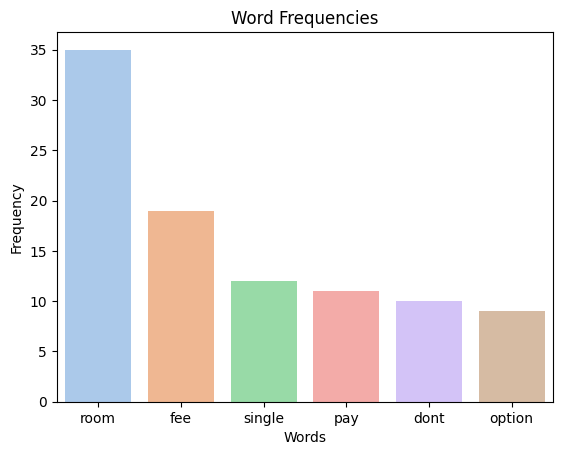

In [27]:
word_subset = word_frequency.head(6)
custom_palette = sns.color_palette('pastel')

sns.barplot(data=word_subset, x=0, y=1,
            color='steelblue', palette=custom_palette)
plt.title('Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')


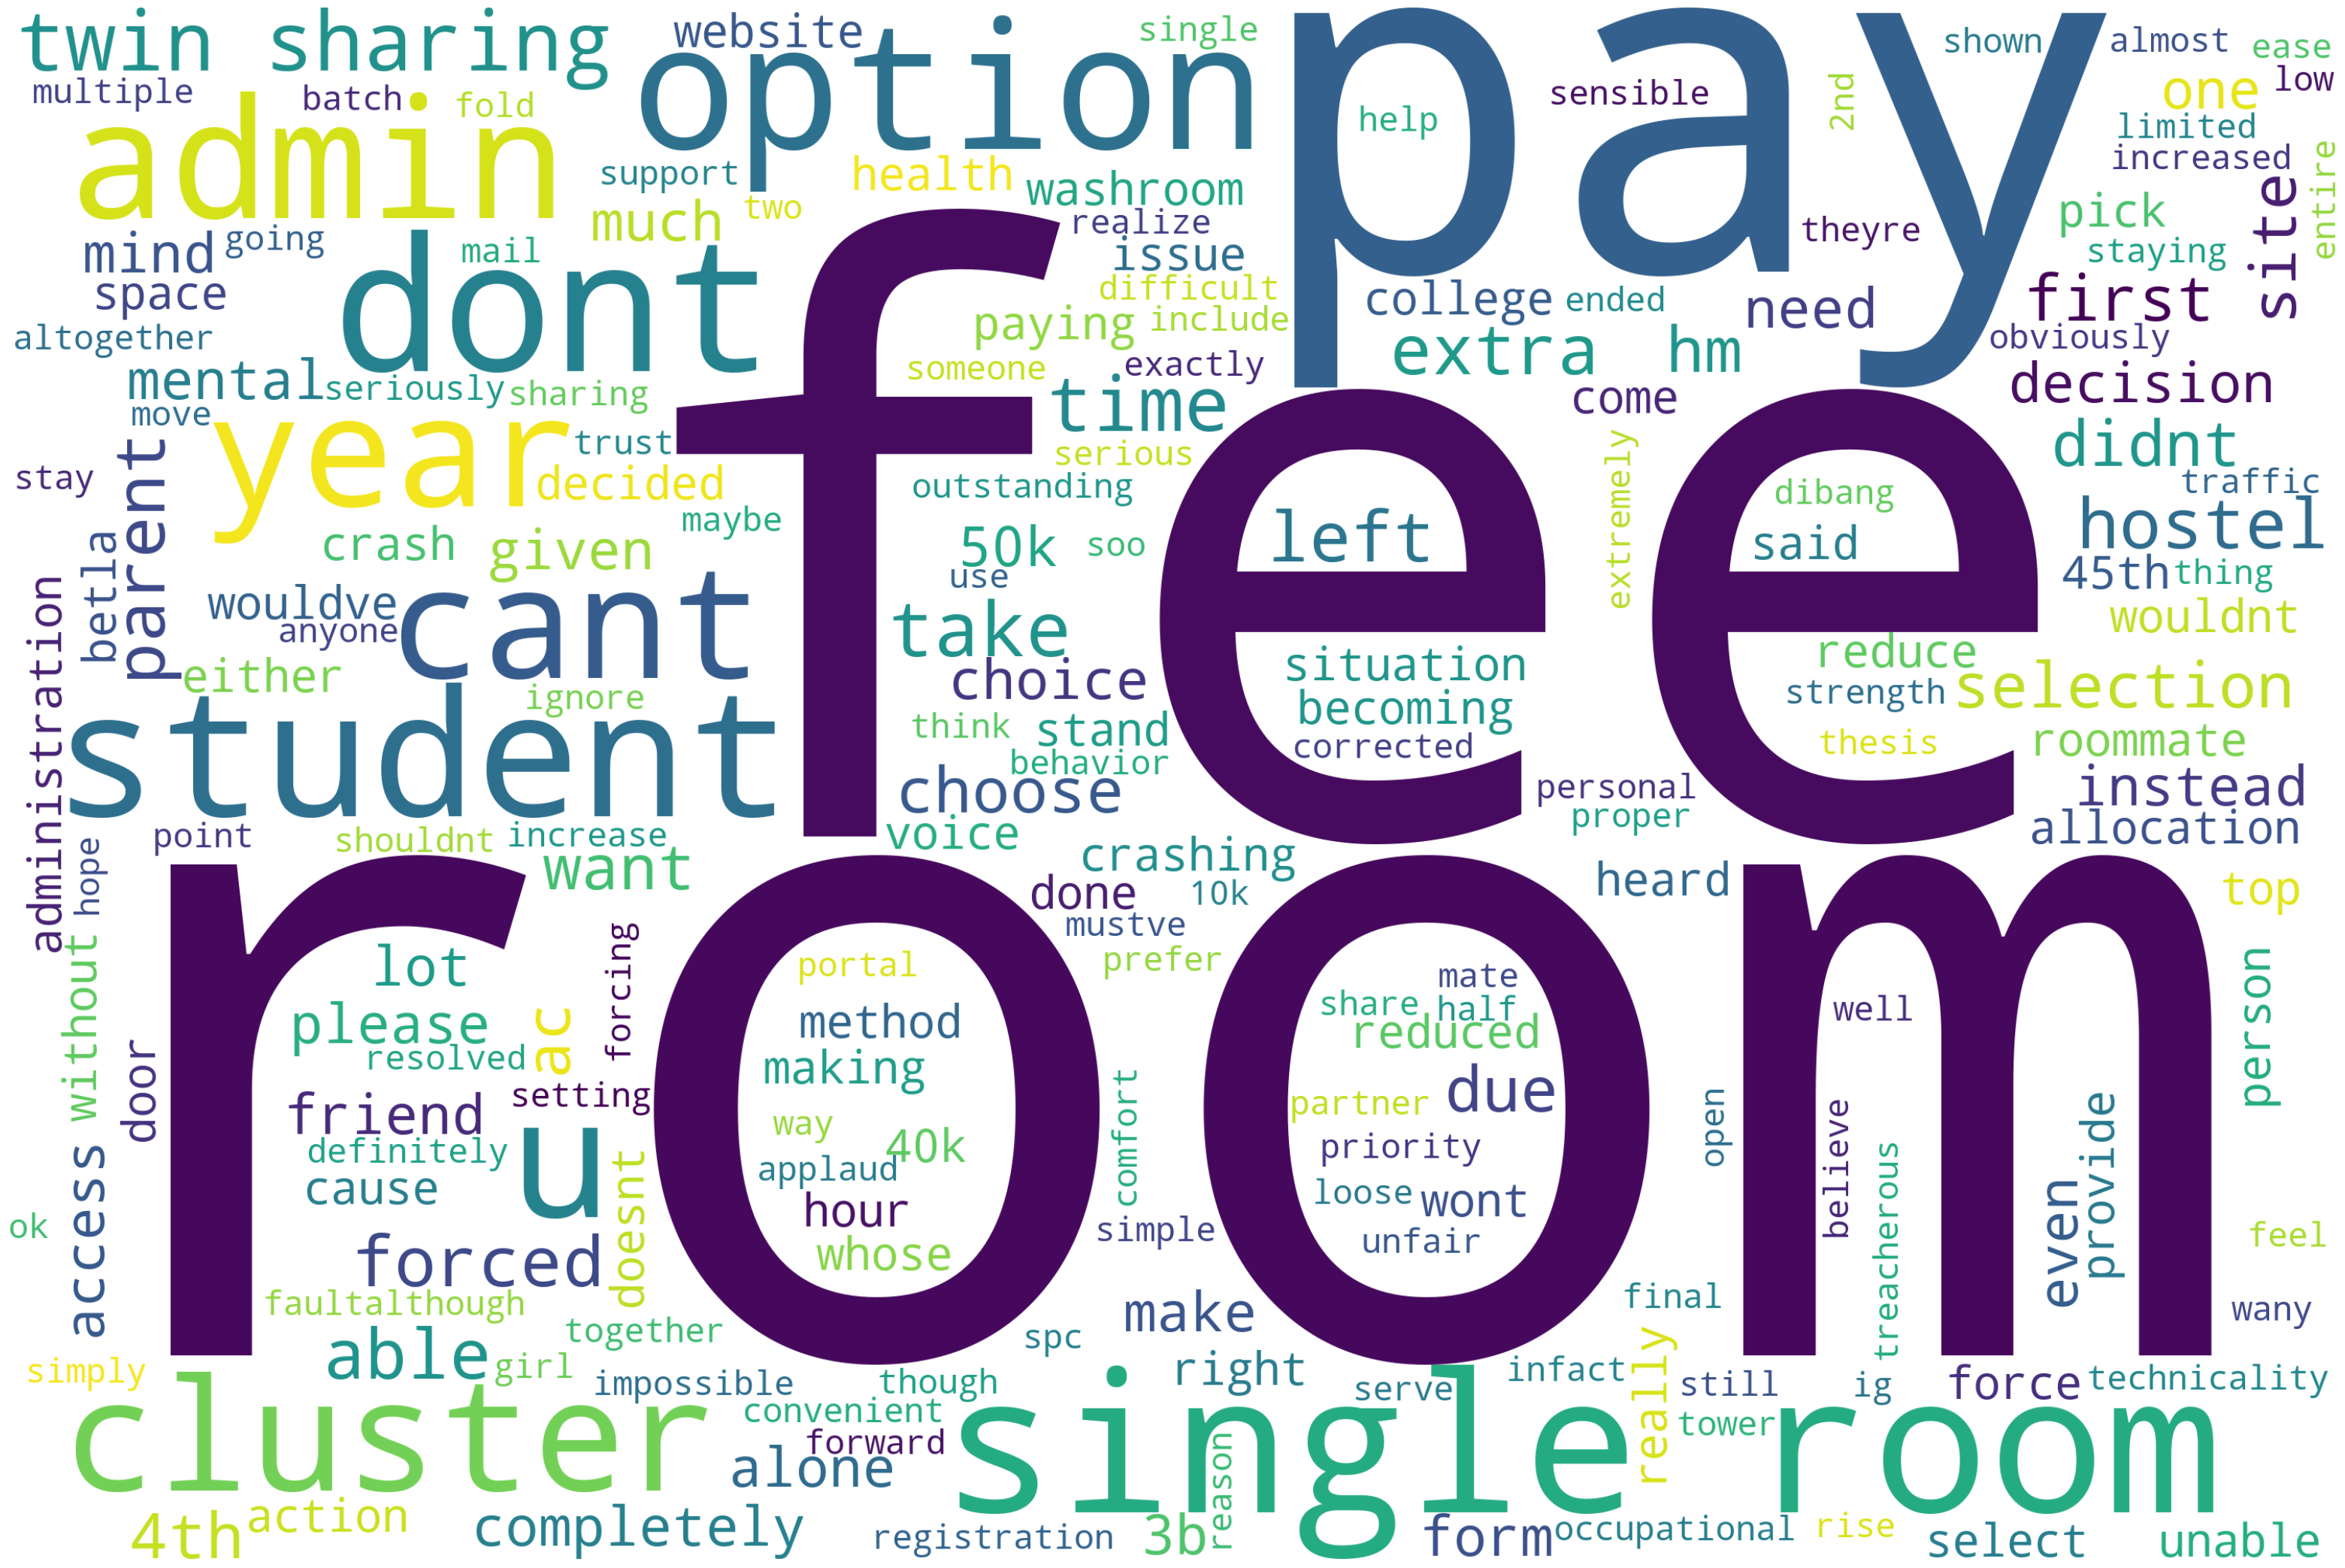

In [28]:
from wordcloud import WordCloud
tf_idf_counter = df.T.sum(axis=1)
wordcloud = WordCloud(width=3000, height=2000, background_color='white')
wordcloud.generate_from_text(string_words)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


From both the visualizations provided, we clearly see the most common word was room- which was to be expected which is followed right after fee, which makes sense as the hike in fee is the most common complaint by all the students.